In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.metadata.create_all(engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
first_row = session.query(measurement).first()
print(first_row.__dict__)

# The above instruction reveals a 'date' column (and all other columns) in the table which can be used to perform the query of the most recent date
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x00000224E35B7F10>, 'tobs': 18.3, 'station': 'USC00519397', 'date': '2010-01-01', 'id': 0, 'prcp': 2.0}
('2017-08-23',)


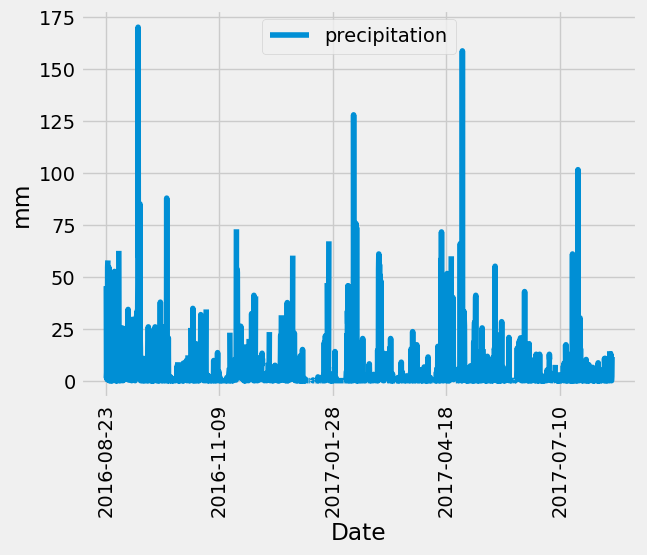

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_data = session.query(measurement).order_by(measurement.date.desc())

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_scores_df = pd.DataFrame(precip_scores, columns=['date', 'precipitation'])

# Sort the dataframe by date
precip_scores_sorted_df = precip_scores_df.set_index(['date']).sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precip_scores_sorted_df.plot()
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('mm')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(precip_scores_sorted_df.describe())

       precipitation
count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
print(session.query(station).count())

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations_desc = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations_desc

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == active_stations_desc[0][0]).all()

[(12.2, 29.4, 22.03582251082252)]

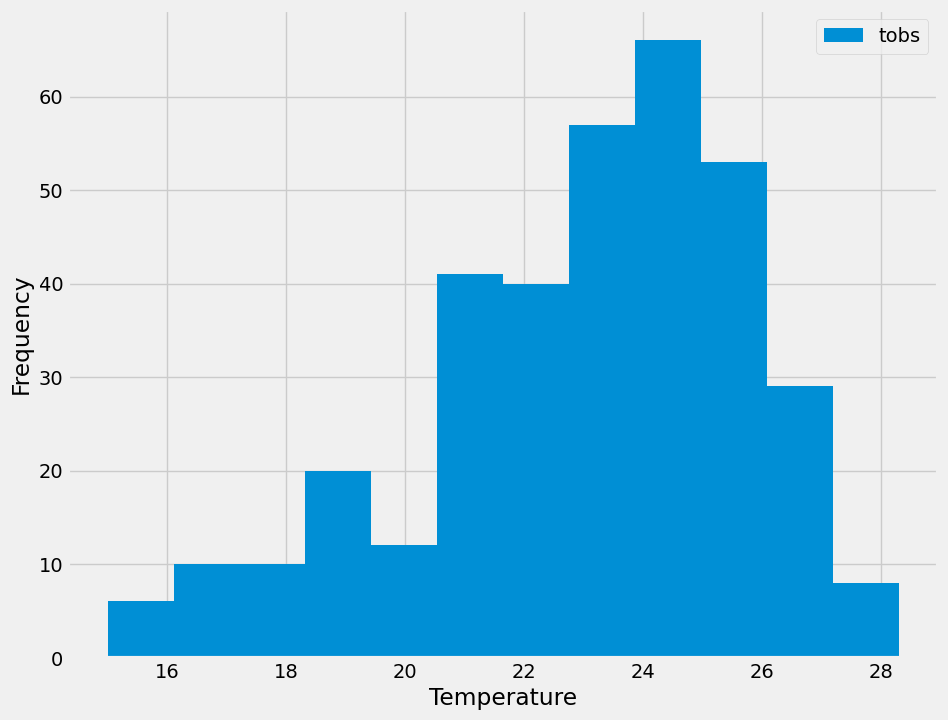

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_last_year = session.query(measurement.date, measurement.tobs).filter(measurement.date >= year_ago).filter(measurement.station == active_stations_desc[0][0]).all()
tobs_last_year_df = pd.DataFrame(tobs_last_year , columns=["date" , "tobs"])
tobs_last_year_df.plot.hist(bins=12 ,figsize=(10,8))
plt.xlabel('Temperature')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()